# 4. 統計学による推論

In [20]:
using Distributions
using Plots
using Statistics
using HypothesisTests

In [2]:
mu = 171
variance = 36
normal_d = Normal(mu, sqrt(variance))

Normal{Float64}(μ=171.0, σ=6.0)

In [3]:
function make_sample_mean(d, n)
    mean(rand(d, n))
end

make_sample_mean (generic function with 1 method)

In [6]:
function make_sample_mean_est(d, n, m)
    x_bars = [make_sample_mean(d, n) for _ in 1:m]
    mean(x_bars), var(x_bars)
end

make_sample_mean_est (generic function with 1 method)

In [8]:
make_sample_mean_est(normal_d, 5, 10)

(172.4558952486064, 7.086818096142668)

一致性

nを大きくしていく

In [11]:
n_max = 1_000
m = 1_000

1000

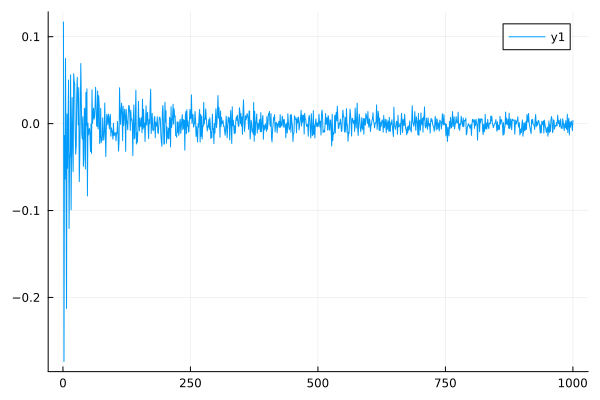

In [13]:
plot(1:n_max, [mu - make_sample_mean_est(normal_d, n, m)[1] for n in 1:n_max])

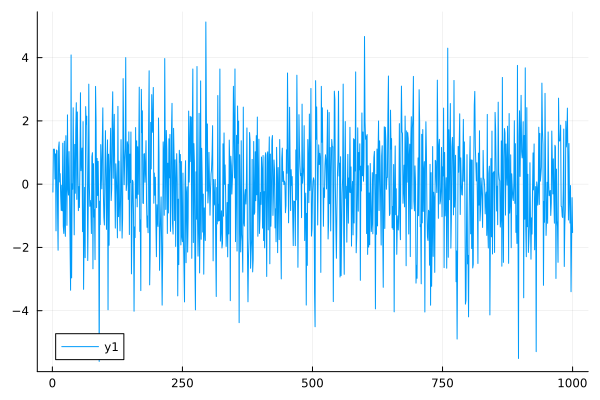

In [16]:
plot(1:n_max, [variance - make_sample_mean_est(normal_d, n, m)[2] * n for n in 1:n_max])

不偏性

mを固定してnを変化させていく．ただ一致性と同じことをしていることになるのでどうすればよいかは不明

中心極限定理

In [17]:
function make_sample_mean_est2(d, n, m)
    x_bars = [make_sample_mean(d, n) for _ in 1:m]
    (x_bars .- mu) ./ (sqrt(var(x_bars)))
end

make_sample_mean_est2 (generic function with 1 method)

In [22]:
datas = make_sample_mean_est2(normal_d, 100_000, 10_000)

10000-element Vector{Float64}:
  1.780284252295907
  0.15826232695123926
  1.4686019657125313
  0.7741596653422126
 -0.5321244412259808
  0.18343567184521414
 -0.7774868357311034
 -0.13050917103522483
 -1.7382340867115122
 -0.38544744191270963
  ⋮
 -0.13699325847903746
  0.6332214567823816
  1.1814981532304156
  0.41529934341554187
 -1.9094442690760887
  0.8583183854758092
 -0.7709733211456308
  0.020608955992364175
 -0.8810235764318942

In [23]:
mean(datas)

0.002361092332060093

In [24]:
std(datas)

1.0

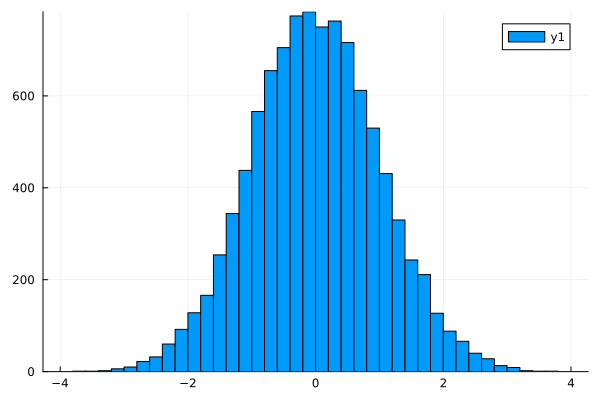

In [25]:
histogram(datas)

In [26]:
function myqqplot(obs,F⁰,title)
    nobs=length(obs)
    sort!(obs)
    quantiles⁰ = [quantile(F⁰,i/nobs) for i in 1:nobs]
    # Note that only n-1 points may be plotted, as quantile(F⁰,1) may be inf
    plot(quantiles⁰, obs, seriestype=:scatter, xlabel="Theoretical Quantiles", ylabel = "Sample Quantiles", title=title, label="" )
    plot!(obs,obs,label="")
end

myqqplot (generic function with 1 method)

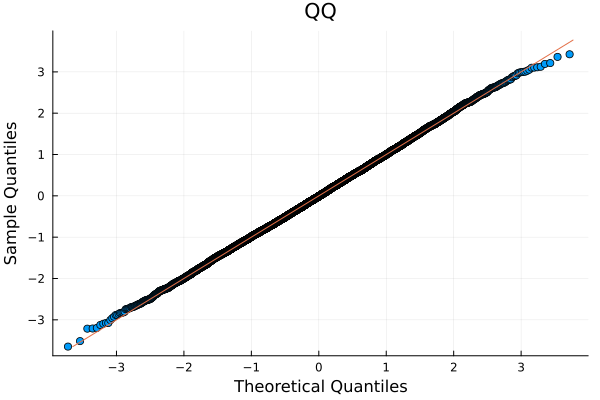

In [27]:
myqqplot(datas, Normal(0, 1), "QQ")

## 問題

#### 4-3

In [7]:
datas = [0, -4, 2, 3, -2, 3]
var(datas)

2.875181153713043

In [10]:
mean(datas) / sqrt(var(datas) / length(datas))

0.2839809171235324

#### 4-A

In [48]:
datas = [0 6 2 4 -1 8 6 -2 3 -1 7]
t = mean(datas) / sqrt(var(datas) / length(datas))

2.7083654762621308

In [14]:
d = TDist(length(datas) - 1)

TDist{Float64}(ν=10.0)

In [52]:
(1 - cdf(d, t)) * 2

0.021995237338764184

In [50]:
quantile(d, cdf(d, t))

2.7083654762621294

In [49]:
quantile(d, 0.975)

0.975

In [43]:
OneSampleTTest(vec(datas))

One sample t-test
-----------------
Population details:
    parameter of interest:   Mean
    value under h_0:         0
    point estimate:          2.90909
    95% confidence interval: (0.5158, 5.302)

Test summary:
    outcome with 95% confidence: reject h_0
    two-sided p-value:           0.0220

Details:
    number of observations:   11
    t-statistic:              2.7083654762621308
    degrees of freedom:       10
    empirical standard error: 1.0741131263812311


#### 4-B

In [56]:
quantile(Normal(0, 1), 0.975)

1.9599639845400576

In [58]:
[quantile(TDist(i), 0.975) for i in [5, 10, 100, 1000, 10000]]

5-element Vector{Float64}:
 2.570581835636314
 2.228138851986274
 1.983971518523551
 1.9623390808263987
 1.9602012398905322